## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING THE DATASET

In [2]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')

In [3]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
car_df.tail()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


## VISUALIZATION OF DATA

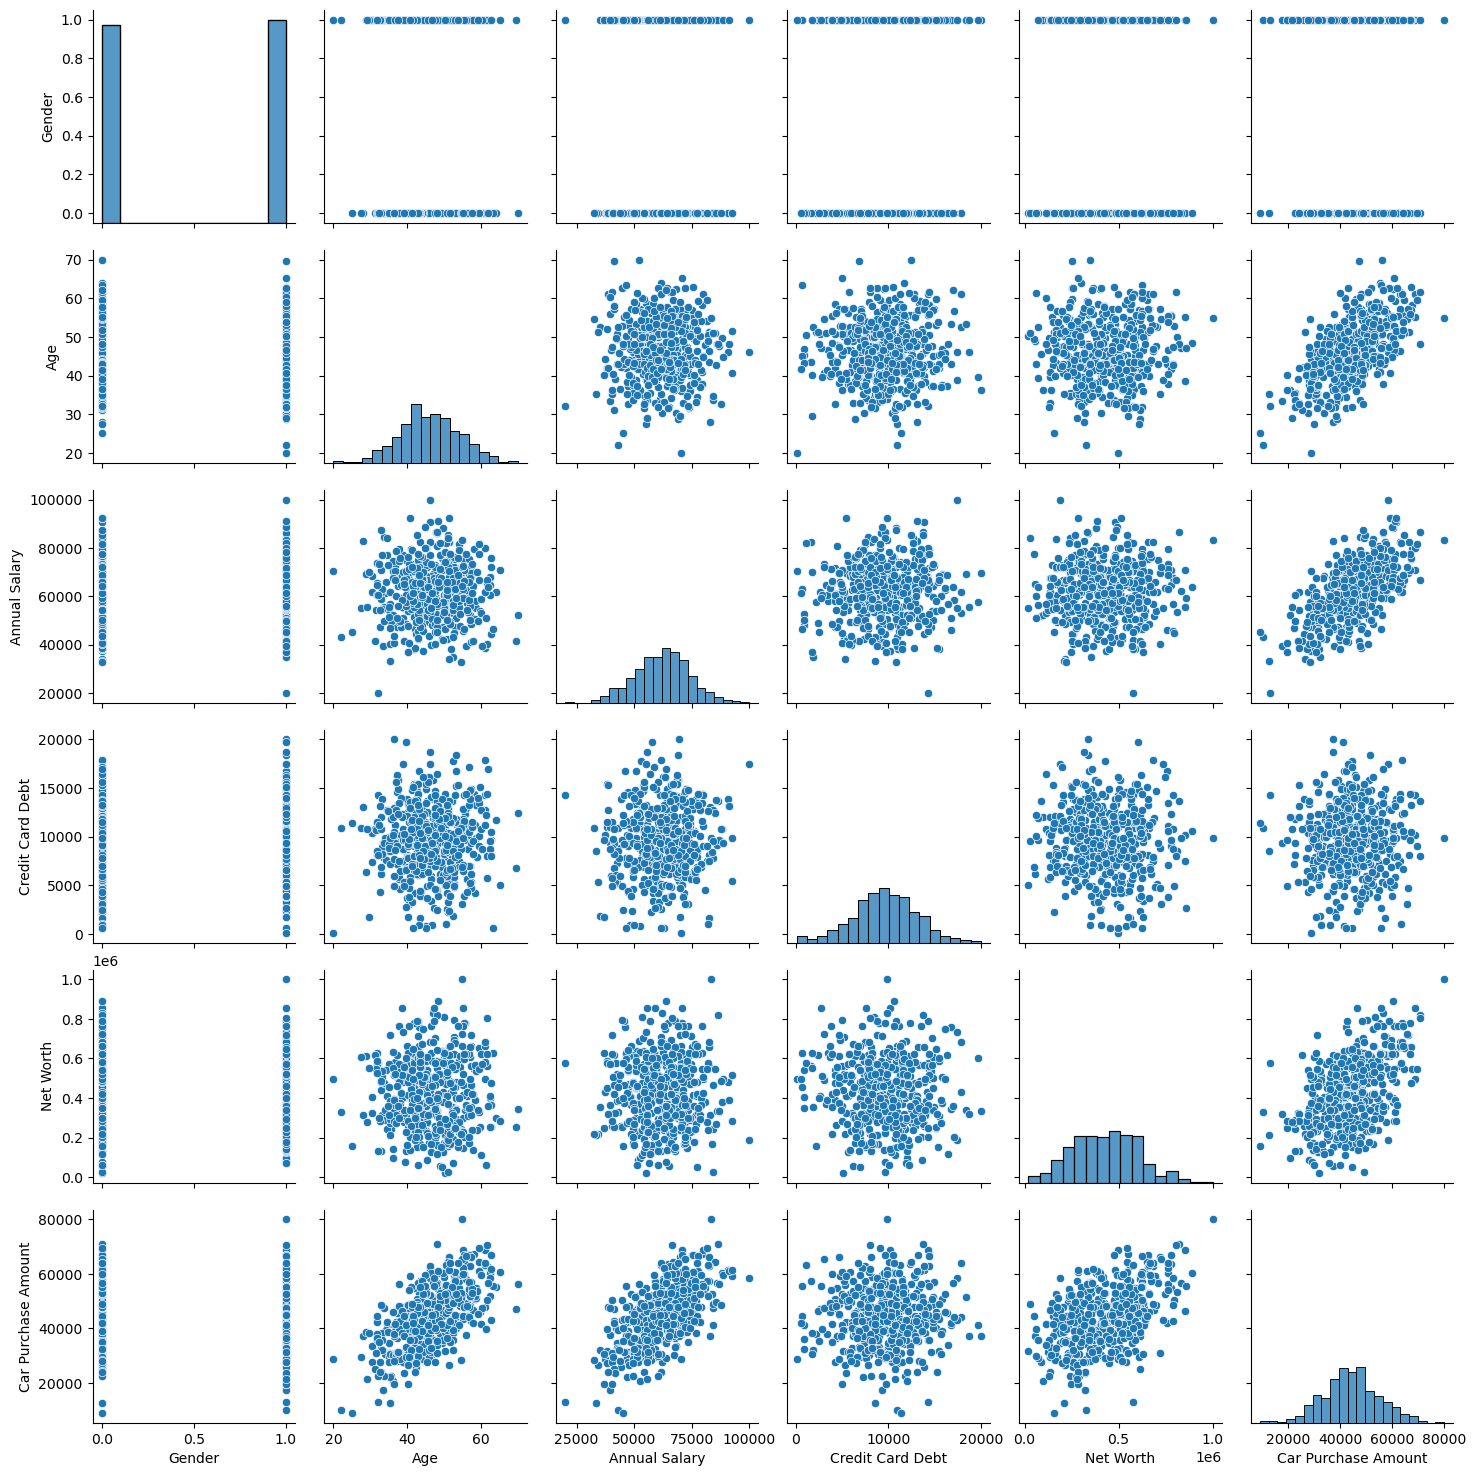

In [5]:
sns.pairplot(car_df)

## DATA CLEANING

In [6]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [7]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [8]:
y = car_df['Car Purchase Amount']

In [9]:
y.head()

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64

In [10]:
X.shape

(500, 5)

In [11]:
y.shape

(500,)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

In [14]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [15]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [16]:
y = y.values.reshape(-1,1)

In [17]:
y.shape

(500, 1)

In [18]:
y_scaled = scaler.fit_transform(y)

In [19]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

## TRAINING THE MODEL

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [21]:
X_train.shape

(375, 5)

In [22]:
X_test.shape

(125, 5)

In [23]:
import keras

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [25]:
model = Sequential()

In [26]:
model.add(Dense(40, input_dim = 5, activation = 'relu'))

In [27]:
model.add(Dense(40, activation = 'relu'))

In [28]:
model.add(Dense(1, activation = 'linear'))

In [29]:
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x0000024456B90340>>

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                240       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1921 (7.50 KB)
Trainable params: 1921 (7.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
epochs_hist = model.fit(X_train, y_train, epochs = 20, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/20
6/6 [==============================] - 2s 101ms/step - loss: 0.3063 - val_loss: 0.1485
Epoch 2/20
6/6 [==============================] - 0s 16ms/step - loss: 0.1267 - val_loss: 0.0488
Epoch 3/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0389 - val_loss: 0.0182
Epoch 4/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0183 - val_loss: 0.0232
Epoch 5/20
6/6 [==============================] - 0s 18ms/step - loss: 0.0202 - val_loss: 0.0244
Epoch 6/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0164 - val_loss: 0.0162
Epoch 7/20
6/6 [==============================] - 0s 8ms/step - loss: 0.0099 - val_loss: 0.0103
Epoch 8/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0078 - val_loss: 0.0090
Epoch 9/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0080 - val_loss: 0.0088
Epoch 10/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0073 - val_loss: 0.0085
Epoch 11/20
6/6 [================

## EVALUATING THE MODEL

In [33]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

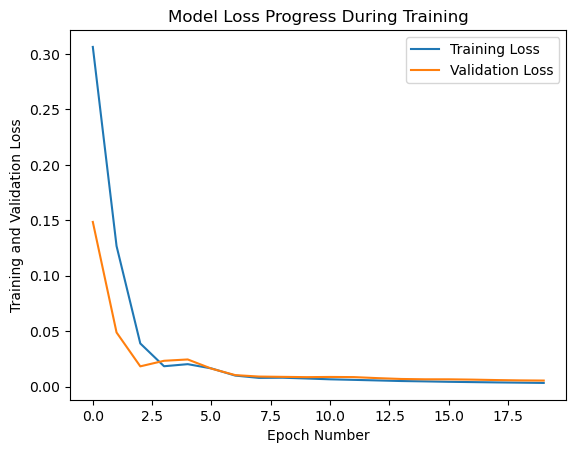

In [36]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [37]:
y_predict = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [46]:
X_test = np.array([[1,50,50000,10000,600000]])

In [47]:
y_predict = model.predict(X_test)

1/1 [==============================] - 0s 47ms/step


In [48]:
y_predict

array([[184895.62]], dtype=float32)